In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv("/home/siddharth/Desktop/driver-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
df=df.drop(["id"], axis=1)

In [9]:
from sklearn.cluster import KMeans

In [10]:
model= KMeans(n_clusters= 2)

In [11]:
model.fit(df)

KMeans(n_clusters=2)

In [18]:
print(model.labels_)
len(model.labels_)

[0 0 0 ... 1 1 1]


4000

In [27]:
clusters=np.unique(model.labels_)

In [26]:
pd.value_counts(model.labels_)

0    3200
1     800
dtype: int64

/home/siddharth/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


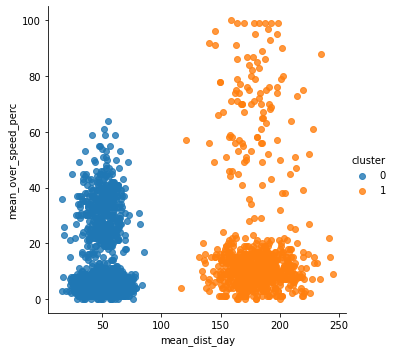

In [44]:
df["cluster"]=model.labels_
sns.lmplot("mean_dist_day", "mean_over_speed_perc", data=df, hue="cluster", height=5, aspect= 1, fit_reg= False)

In [46]:
model2=KMeans (n_clusters=4)

In [47]:
model2.fit(df)

KMeans(n_clusters=4)

In [52]:
np.unique(model2.labels_)

array([0, 1, 2, 3], dtype=int32)

In [53]:
pd.value_counts(model2.labels_)

2    2773
0     696
1     427
3     104
dtype: int64

In [56]:
df2=df.drop("cluster", axis=1)
df2["clusters"]=model2.labels_

In [57]:
df2.head()

,mean_dist_day,mean_over_speed_perc,clusters
0,71.24,28,1
1,52.53,25,1
2,64.54,27,1
3,55.69,22,1
4,54.58,25,1


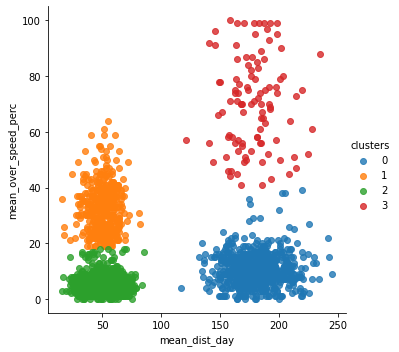

In [59]:
sns.lmplot("mean_dist_day", "mean_over_speed_perc", data= df2, hue= "clusters", fit_reg= False)

**4 clusters fit the data set better**  